In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,586 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import re
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumBarunGothic') 

In [91]:
from matplotlib import font_manager, rc

 

import matplotlib

 

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [92]:
train = pd.read_csv('G:\내 드라이브\Github\BigContest_Flood-ZERO\문우혁\Data/dam_train.csv')
test = pd.read_csv('G:\내 드라이브\Github\BigContest_Flood-ZERO\문우혁\Data/dam_test.csv')
submission = pd.read_csv('G:\내 드라이브\Github\BigContest_Flood-ZERO\문우혁\Data/submission.csv')

In [93]:
drops = ['홍수사상번호','수위D1','수위D2','수위D3','수위D4','수위D5','수위D6']
train = train.drop(drops, axis = 1)
test = test.drop(drops, axis = 1)

In [124]:
train['연'] = train['연'].apply(str)
train['월'] = train['월'].apply(str)
train['일'] = train['일'].apply(str)

In [125]:
train['일자'] = train[['연','월','일']].apply('-'.join, axis=1)

In [126]:
train.head(3)

,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,...,강우C5,강우D5,수위E5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6,일자
0,2006,7,10,8,189.1,6.4,7,7,7,8,...,8,8,2.5,6.4,7,7,8,8,2.5,2006-7-10
1,2006,7,10,9,217.0,6.3,7,8,7,8,...,10,10,2.5,7.3,7,8,10,10,2.5,2006-7-10
2,2006,7,10,10,251.4,6.4,7,9,7,8,...,10,11,2.5,8.2,7,9,10,11,2.5,2006-7-10


In [119]:
print(str(train['연'])+str(train['월'])+str(train['일']))

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2886    2017
2887    2017
2888    2017
2889    2017
2890    2017
Name: 연, Length: 2891, dtype: int640       7
1       7
2       7
3       7
4       7
       ..
2886    7
2887    7
2888    7
2889    7
2890    7
Name: 월, Length: 2891, dtype: int640       10
1       10
2       10
3       10
4       10
        ..
2886    18
2887    18
2888    18
2889    18
2890    18
Name: 일, Length: 2891, dtype: int64


In [ ]:
train['일자'] = 

In [95]:
test.head(3)

,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,...,강우B5,강우C5,강우D5,수위E5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6
0,2018,7,1,6,NaN,14.3,32,0,0,0,...,0,1,0,1.9,0.8,32,0,1,0,1.9
1,2018,7,1,7,NaN,11.0,20,1,0,0,...,1,14,8,1.9,4.8,21,1,14,8,1.9
2,2018,7,1,8,NaN,7.9,11,5,0,0,...,5,19,24,1.9,12.9,21,5,19,24,1.9


In [96]:
submission.head(3)

,NO,홍수사상번호,연,월,일,시간,유입량
0,1,26,2018,7,1,6,NaN
1,2,26,2018,7,1,7,NaN
2,3,26,2018,7,1,8,NaN


In [97]:
train.describe()

,연,월,일,시간,유입량,유역평균강수1,강우A1,강우B1,강우C1,강우D1,...,강우B5,강우C5,강우D5,수위E5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6
count,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,...,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000,2891.000000
mean,2010.765825,7.426496,15.719474,12.534763,1746.902802,68.196783,79.865790,64.320996,40.029747,53.355240,...,57.274991,51.492909,55.565202,4.586683,61.934037,84.734694,58.176064,39.168108,53.470771,4.586683
std,2.717014,0.701242,7.594878,6.947735,2181.791268,60.221829,72.820217,64.530822,45.931246,56.709941,...,60.574060,52.108792,57.249386,2.422604,56.415913,74.374884,61.082018,44.579800,56.013723,2.422604
min,2006.000000,6.000000,1.000000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000
25%,2009.000000,7.000000,11.000000,7.000000,384.750000,19.600000,23.000000,13.000000,3.000000,6.500000,...,9.000000,10.000000,9.000000,2.700000,15.300000,25.000000,9.000000,3.000000,7.000000,2.700000
50%,2011.000000,7.000000,15.000000,13.000000,1065.500000,58.900000,55.000000,51.000000,22.000000,34.000000,...,43.000000,34.000000,38.000000,4.100000,47.900000,61.000000,44.000000,22.000000,35.000000,4.100000
75%,2012.000000,8.000000,21.000000,19.000000,2213.000000,103.250000,123.500000,91.000000,64.000000,85.000000,...,84.000000,78.000000,86.000000,5.700000,92.850000,130.000000,85.000000,62.000000,85.000000,5.700000
max,2017.000000,9.000000,31.000000,24.000000,21504.400000,328.400000,329.000000,367.000000,253.000000,262.000000,...,357.000000,276.000000,262.000000,16.700000,318.400000,345.000000,359.000000,247.000000,261.000000,16.700000


In [98]:
train.corr()['유입량']

연         -0.349836
월         -0.116182
일          0.052060
시간         0.016276
유입량        1.000000
유역평균강수1    0.742259
강우A1       0.617424
강우B1       0.739950
강우C1       0.605588
강우D1       0.700568
수위E1       0.903896
유역평균강수2    0.752176
강우A2       0.615217
강우B2       0.743754
강우C2       0.626355
강우D2       0.700568
수위E2       0.903896
유역평균강수3    0.752176
강우A3       0.615217
강우B3       0.771063
강우C3       0.641772
강우D3       0.710927
수위E3       0.903896
유역평균강수4    0.760470
강우A4       0.612004
강우B4       0.771063
강우C4       0.619889
강우D4       0.722170
수위E4       0.903896
유역평균강수5    0.767839
강우A5       0.612004
강우B5       0.771063
강우C5       0.619889
강우D5       0.722170
수위E5       0.903896
유역평균강수6    0.790926
강우A6       0.612004
강우B6       0.767258
강우C6       0.669108
강우D6       0.727581
수위E6       0.903896
Name: 유입량, dtype: float64

In [99]:
X = train.drop(['유입량'], axis=1)
y = train['유입량']

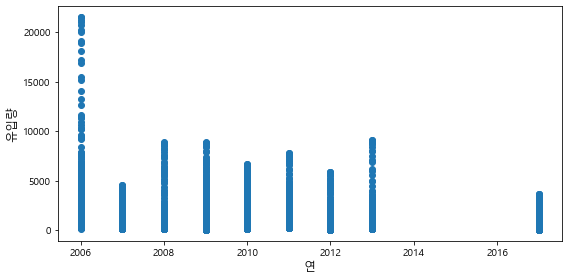

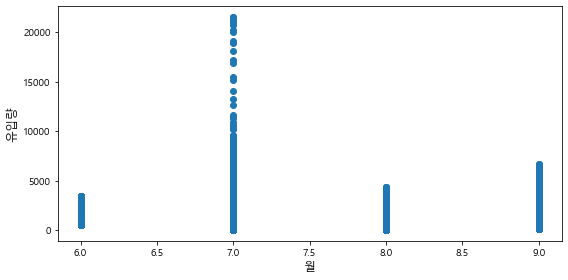

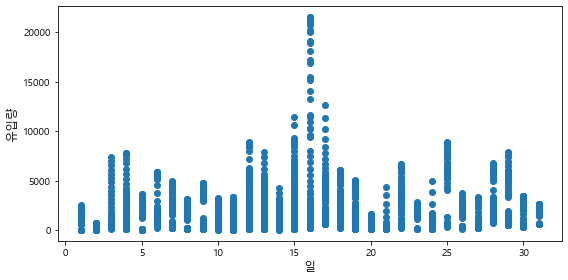

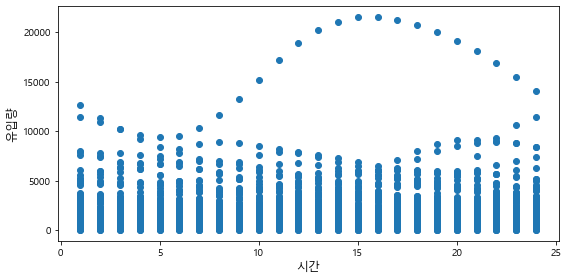

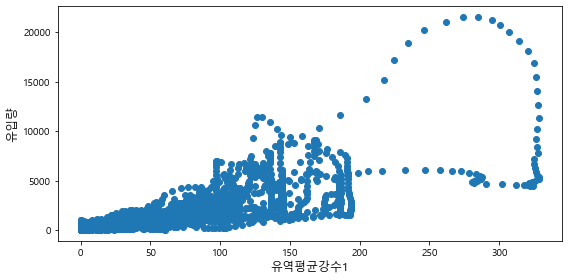

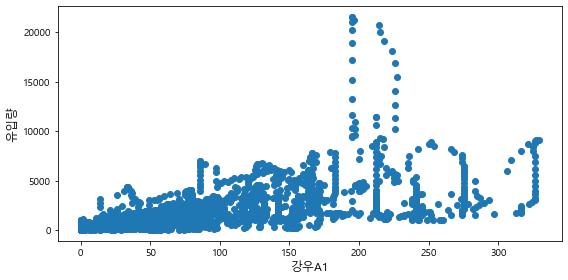

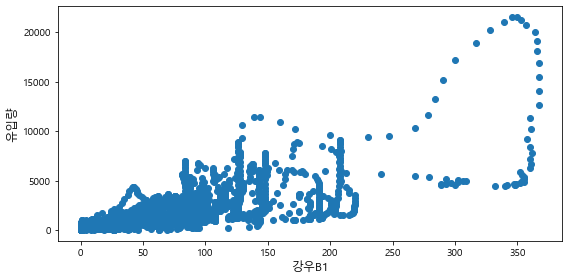

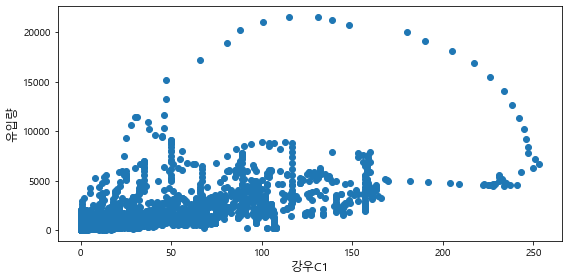

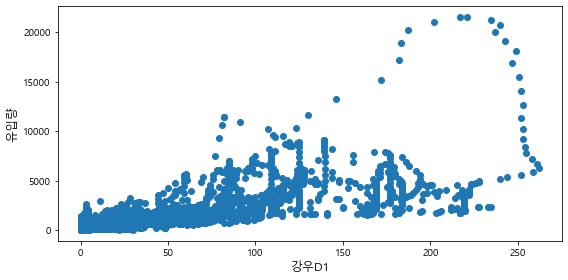

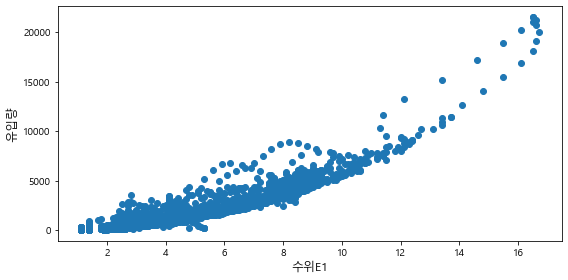

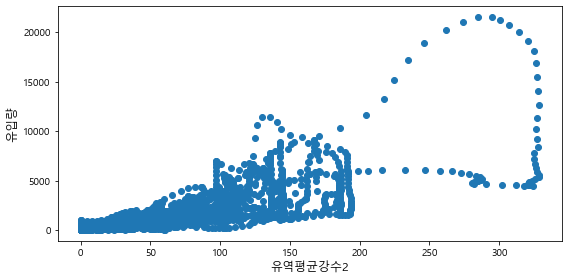

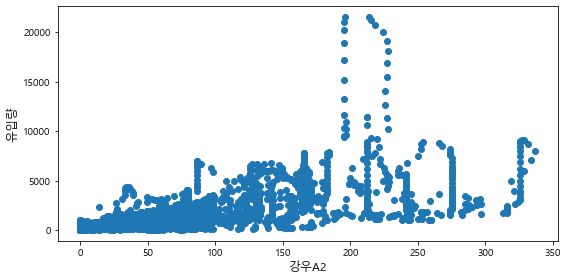

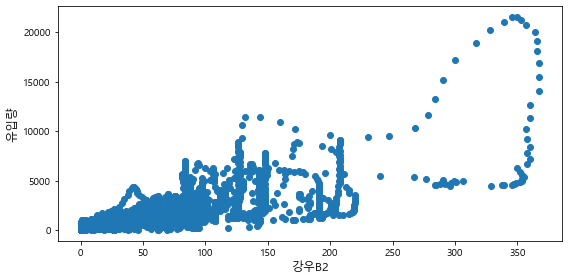

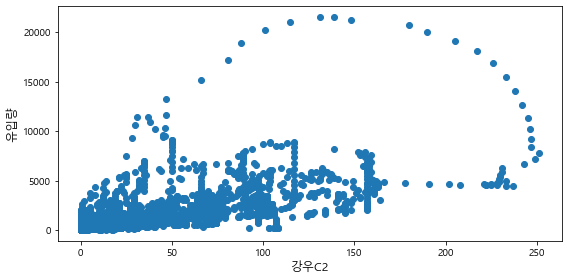

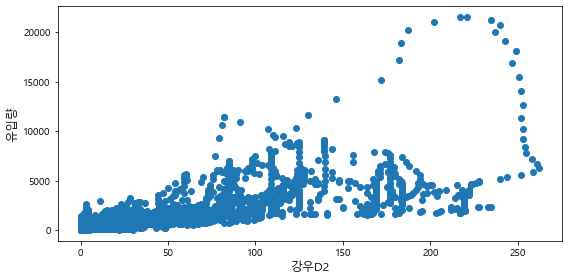

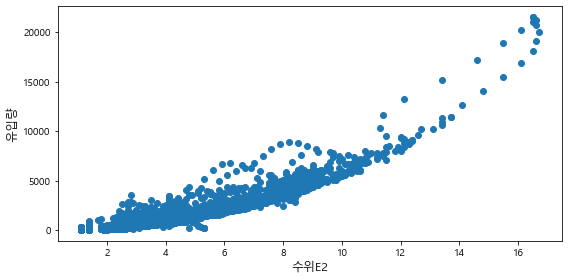

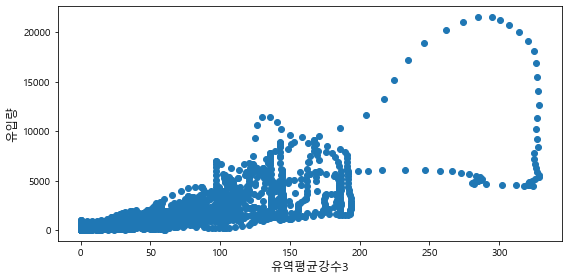

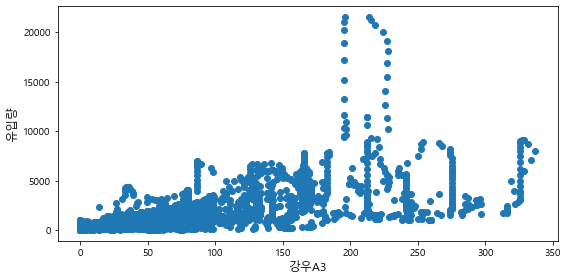

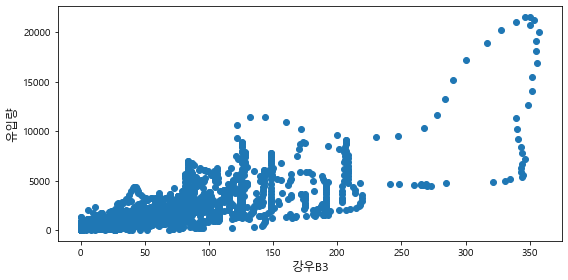

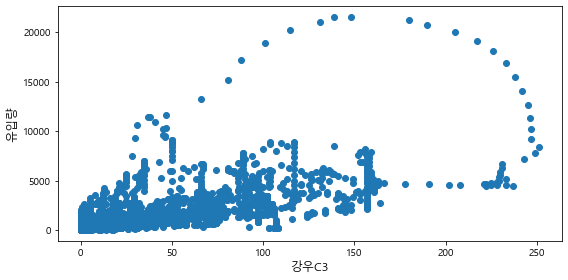

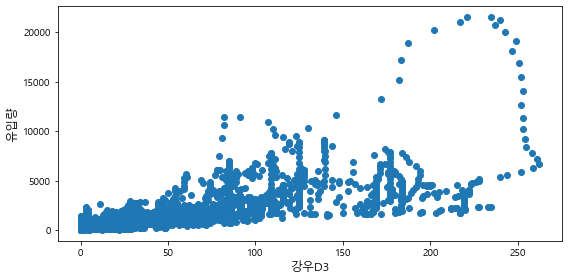

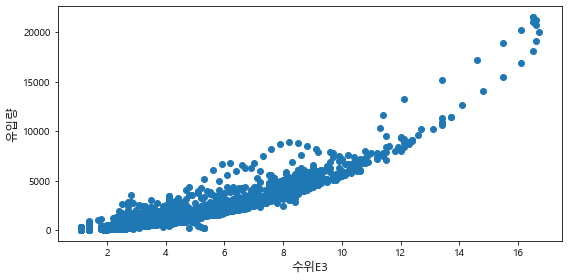

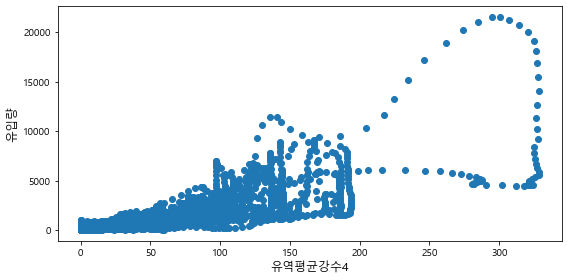

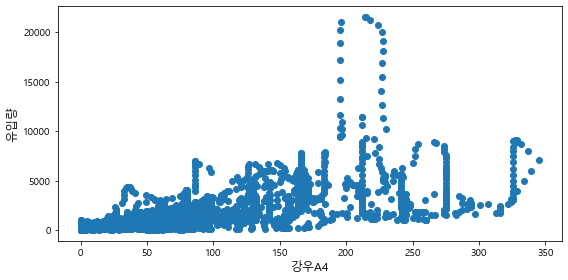

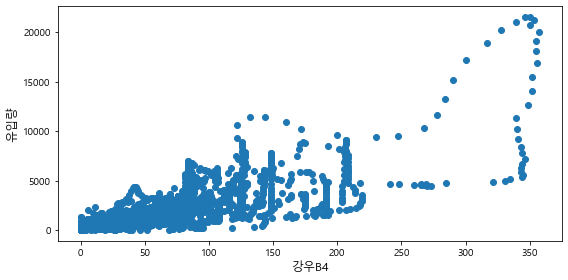

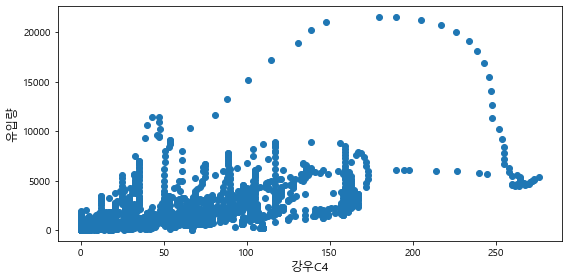

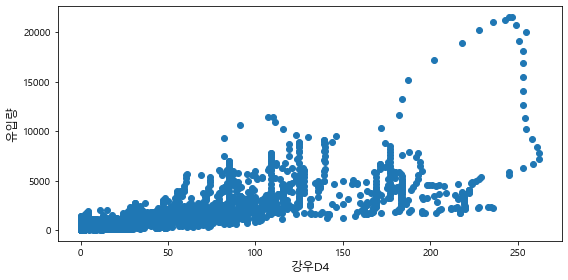

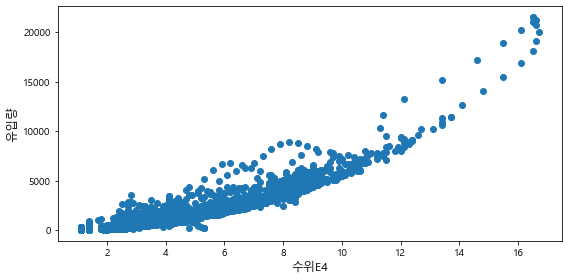

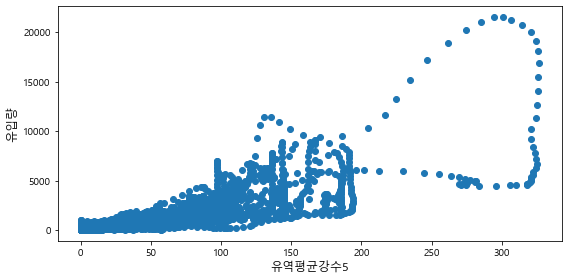

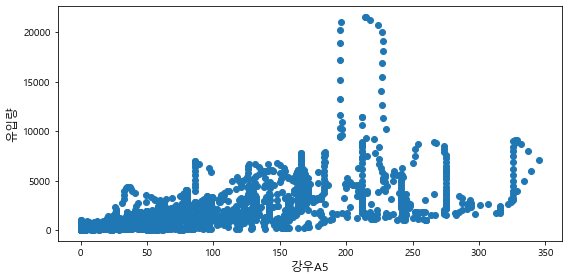

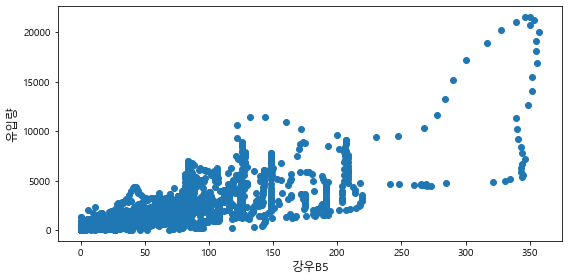

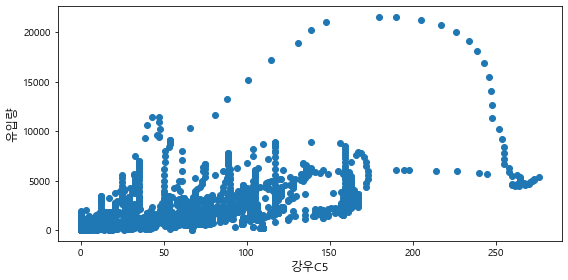

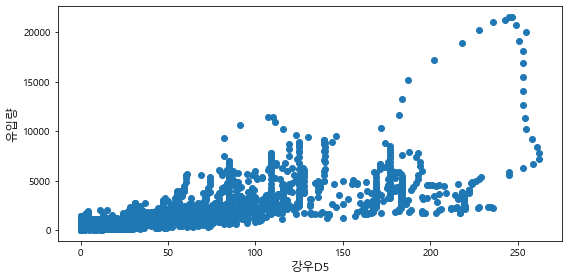

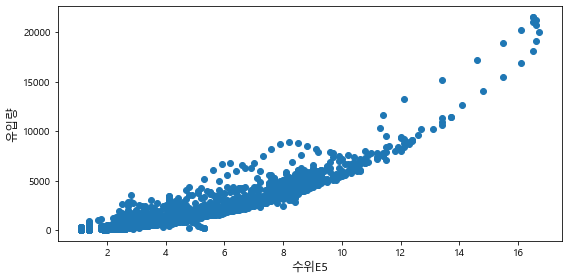

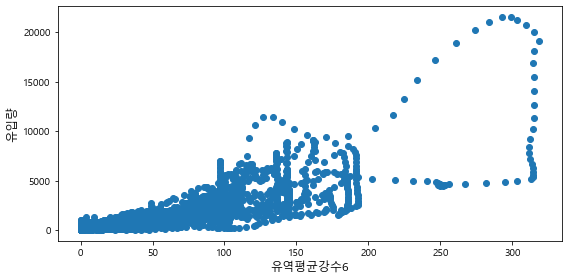

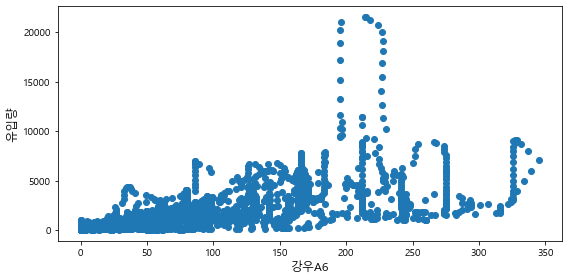

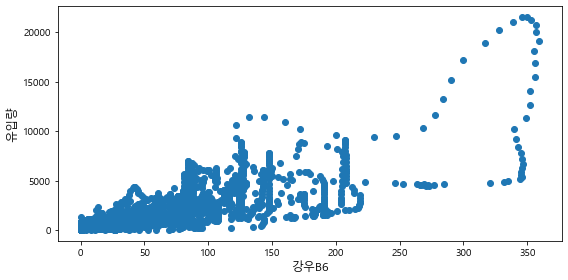

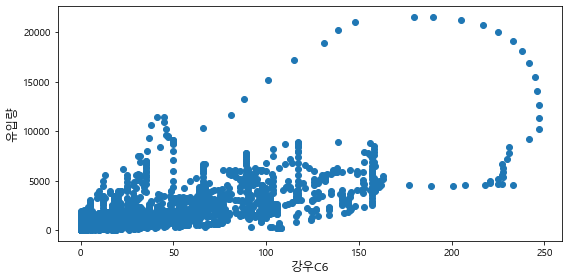

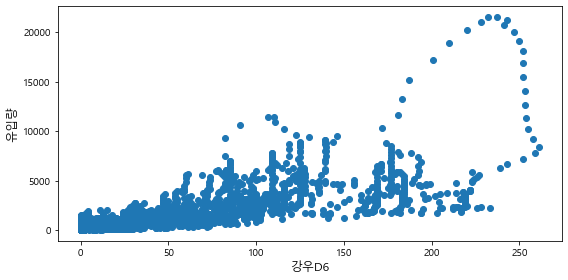

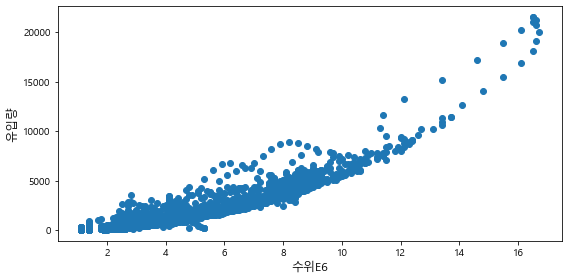

In [100]:
for i, col in enumerate(X.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(train[col], train['유입량'])
  plt.ylabel('유입량', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [102]:
model = LinearRegression()

In [103]:
X.head(3)

,연,월,일,시간,유역평균강수1,강우A1,강우B1,강우C1,강우D1,수위E1,...,강우B5,강우C5,강우D5,수위E5,유역평균강수6,강우A6,강우B6,강우C6,강우D6,수위E6
0,2006,7,10,8,6.4,7,7,7,8,2.5,...,7,8,8,2.5,6.4,7,7,8,8,2.5
1,2006,7,10,9,6.3,7,8,7,8,2.5,...,8,10,10,2.5,7.3,7,8,10,10,2.5
2,2006,7,10,10,6.4,7,9,7,8,2.5,...,9,10,11,2.5,8.2,7,9,10,11,2.5


In [104]:
y.head(3)

0    189.1
1    217.0
2    251.4
Name: 유입량, dtype: float64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_test.head(3)

1697    4008.9
1898    1619.0
1426     993.7
Name: 유입량, dtype: float64

In [107]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8994682931026506
0.8691669915246114


In [108]:
from sklearn.model_selection import cross_val_score
scores = []
scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')

In [109]:
np.sqrt(np.mean(-scores))

927.7259698141764

In [110]:
predict = model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(np.mean(mean_squared_error(y_test, predict))))
rmse

717.9694857086697